In [13]:
import os
import sys
import pickle

import torch
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

# turn off dark mode
plt.style.use('default')

from tqdm import tqdm

np.random.seed(42)
torch.manual_seed(42)

In [8]:
with open("./train_dataset.pkl", "rb") as f:
    train_df: pd.DataFrame = pickle.load(f)['Adj Close']

train_df = train_df.fillna(method='ffill').dropna(axis=1) # attempt to fill nan values
# train_df = train_df.pct_change(1)[1:].fillna(0.0)

# assert pd.isna(train_df).any().sum() == 0

stocks = train_df.columns # stocks to keep without nan values

with open("./test_dataset.pkl", "rb") as f:
    test_df = pickle.load(f)['Adj Close'][stocks]

# test_df = test_df.pct_change(1)[1:]

# assert pd.isna(test_df).any().sum() == 0

train_df

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-02,59.257793,37.547699,124.741768,44.660526,72.923531,78.981331,55.920242,26.629999,151.432709,243.259995,...,145.850967,40.196255,63.113827,41.842003,63.607929,71.461327,104.534012,148.279999,45.405937,82.754311
2018-07-03,59.045719,36.950611,125.028900,43.882687,73.315132,79.865852,55.746063,26.760000,151.534744,242.009995,...,143.986923,40.213646,63.484352,42.365269,63.118481,71.214317,104.636841,148.320007,44.865799,83.160126
2018-07-05,59.575920,37.185535,125.816002,44.235817,73.996513,80.344978,56.222771,26.930000,152.889236,244.179993,...,146.513351,40.509266,63.538387,42.726784,63.174980,71.122826,105.506233,148.250000,44.908665,83.237419
2018-07-06,60.048294,37.283417,127.029213,44.849010,75.907509,81.054459,56.983654,27.280001,152.620193,248.190002,...,148.424713,40.830986,63.553825,43.173946,62.883186,71.607712,106.571960,148.250000,45.080135,83.923431
2018-07-09,60.848412,38.477581,130.529709,45.471756,76.001511,81.312439,57.240330,27.889999,154.123108,249.770004,...,151.518875,39.265907,63.993828,43.583042,64.040871,72.431107,107.188942,149.720001,46.237579,84.532120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,128.394821,14.070000,116.367355,171.328644,140.957336,170.812729,105.235298,73.169998,287.058197,370.420013,...,101.879997,65.049736,106.400002,37.915413,103.792480,130.839462,130.103683,271.220001,29.389999,172.291092
2023-05-24,120.759392,13.800000,114.822830,171.608261,139.602341,170.613266,103.543419,71.769997,285.782837,365.760010,...,101.089996,64.593529,107.589996,36.998669,100.722755,130.262161,128.406494,261.390015,28.969999,168.768845
2023-05-25,119.262253,14.380000,111.225586,172.756714,137.100082,169.725586,101.652481,72.379997,290.704956,392.059998,...,101.019997,63.760448,105.660004,36.779446,98.559998,129.654999,127.587860,259.690002,28.320000,164.877396


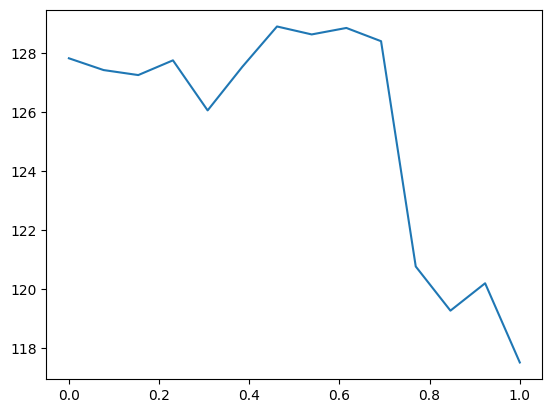

In [16]:
S = stocks[0]
W = 14
V = train_df.iloc[-W:]
v = V[S]
x = np.linspace(0,1,W)

plt.plot(x, v)

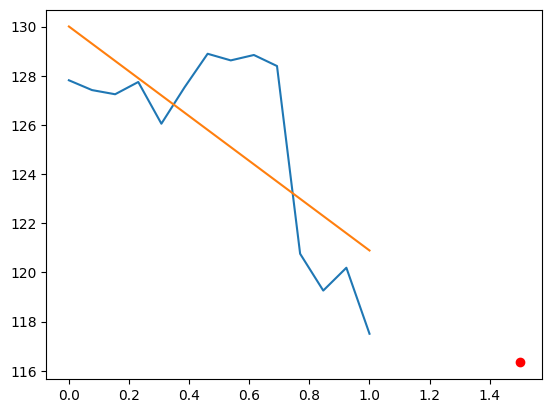

In [32]:
inp = x.reshape(-1,1)
model = linear_model.Lars()
model.fit(inp, v)
y_pred = model.predict(inp)

plt.plot(x,v)
plt.plot(x, y_pred)

next_day_factor = 1.5

next_day_t = np.array([[next_day_factor]])
y_pred_next_day = model.predict(next_day_t)

plt.scatter(next_day_t, y_pred_next_day, color="red")

In [36]:
def predict_next_day_price(price_vec, next_day_factor=1.5):
    w = len(price_vec)
    t = np.linspace(0,1,w)

    # LARS
    inp = t.reshape(-1,1)
    model = linear_model.Lars()
    model.fit(inp, np.array(price_vec))

    next_day_t = np.array([[next_day_factor]])
    y_pred_next_day = model.predict(next_day_t)

    return float(y_pred_next_day)

In [40]:
def predict_next_day_market(df, window_size):
    V = df[-window_size:]

    stocks = V.columns
    next_day_market = np.zeros(len(stocks))

    for i, stock in enumerate(stocks):
        v = V[stock].values
        p = predict_next_day_price(v)
        next_day_market[i] = p

    return next_day_market

In [41]:
market = predict_next_day_market(train_df, window_size=14)
market

array([ 116.33741401,   14.49585725,  104.75012174,  175.52060917,
        131.86315286,  167.62899715,   97.32196742,   67.99328232,
        317.0696943 ,  440.84872219,  175.83492998,   71.49935401,
        211.31183559,  200.53199071,   74.91539165,   76.07815857,
         18.27483818,   64.46883349,   55.70383034,  122.58853727,
        194.76951948,   92.86999828,  214.03870588,  272.83329337,
         46.65828394,  106.771241  ,  105.43060281,  143.58656594,
          9.57999695,  137.12056917,  148.36428135,  209.81436005,
        314.53247375,  172.01239275,  124.25871517,  174.71957179,
        326.58514099,  294.25321263,   65.24938703,   33.52643419,
        266.79876883,   75.30092675,   89.7677136 ,  105.99641309,
        112.7294475 ,   79.35973772,  165.10644684,  844.640979  ,
        158.20320849,  136.87783879,  190.50657327,  159.55386592,
       2257.11157924,  204.5647219 ,   28.89967619,   50.41609421,
         39.69583915,   41.39742611,   70.8008704 ,  234.94885

In [46]:
last_day = train_df.iloc[-1].to_numpy()
r = market / last_day - 1
r

array([-9.94166301e-03, -8.49128824e-03, -6.30875731e-02, -8.69920277e-03,
       -2.28305622e-02,  1.23963925e-02, -3.85535555e-02, -4.50381288e-02,
        3.17427985e-02,  5.66590715e-02, -4.24312041e-03,  9.70932420e-04,
        1.15131494e-02,  2.81583142e-02, -5.80894396e-02, -6.01837482e-02,
       -7.45871734e-02, -1.18204231e-02,  2.45848226e-02, -9.70565988e-03,
       -4.03610942e-02,  8.25097886e-03,  6.22057538e-02, -4.25222612e-02,
        3.20346137e-02, -2.71578810e-02, -1.16268154e-02,  5.13770099e-02,
       -1.64273944e-02,  9.46002463e-02,  7.32927898e-03, -3.98830311e-02,
        2.03319044e-02, -4.71264257e-02,  2.13604424e-02,  1.71754173e-03,
       -7.82252595e-03, -5.46393891e-02, -1.76016961e-02,  4.67830159e-02,
       -2.07163160e-02, -1.66136086e-02, -1.60286057e-02, -4.73964388e-02,
       -1.48610749e-02,  2.44761575e-03, -3.56154293e-02,  5.70129758e-02,
       -2.50284440e-02, -3.93585101e-02, -1.37369556e-02,  1.32334075e-02,
       -8.04714019e-02, -

In [57]:
w = (r/r.sum())
w

array([ 4.97378858e-03,  4.24816979e-03,  3.15625515e-02,  4.35218889e-03,
        1.14220719e-02, -6.20188345e-03,  1.92882452e-02,  2.25324606e-02,
       -1.58808409e-02, -2.83463885e-02,  2.12282229e-03, -4.85755007e-04,
       -5.75999918e-03, -1.40875326e-02,  2.90619981e-02,  3.01097753e-02,
        3.73157721e-02,  5.91372743e-03, -1.22997239e-02,  4.85571681e-03,
        2.01925522e-02, -4.12794362e-03, -3.11213795e-02,  2.12737785e-02,
       -1.60268353e-02,  1.35870184e-02,  5.81686600e-03, -2.57037866e-02,
        8.21858339e-03, -4.73282612e-02, -3.66681953e-03,  1.99533784e-02,
       -1.01719997e-02,  2.35772302e-02, -1.06865747e-02, -8.59281736e-04,
        3.91358973e-03,  2.73359466e-02,  8.80608352e-03, -2.34054232e-02,
        1.03643199e-02,  8.31174591e-03,  8.01907046e-03,  2.37123171e-02,
        7.43495776e-03, -1.22453590e-03,  1.78183082e-02, -2.85234460e-02,
        1.25216665e-02,  1.96909619e-02,  6.87256375e-03, -6.62063995e-03,
        4.02596365e-02,  

In [58]:
w @ r

-0.3787962007844157